# Objective

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.


#### Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read data and check out its head

In [107]:
df = pd.read_csv('data.csv')

In [108]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Use isnull(), info() and describe() methods

In [17]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Use groupby function and check number of people who have exited and number of people still working

In [36]:
exit = df.groupby('left').count()
exit

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


#### Use various data visualisation techniques to find interesting patterns and relations

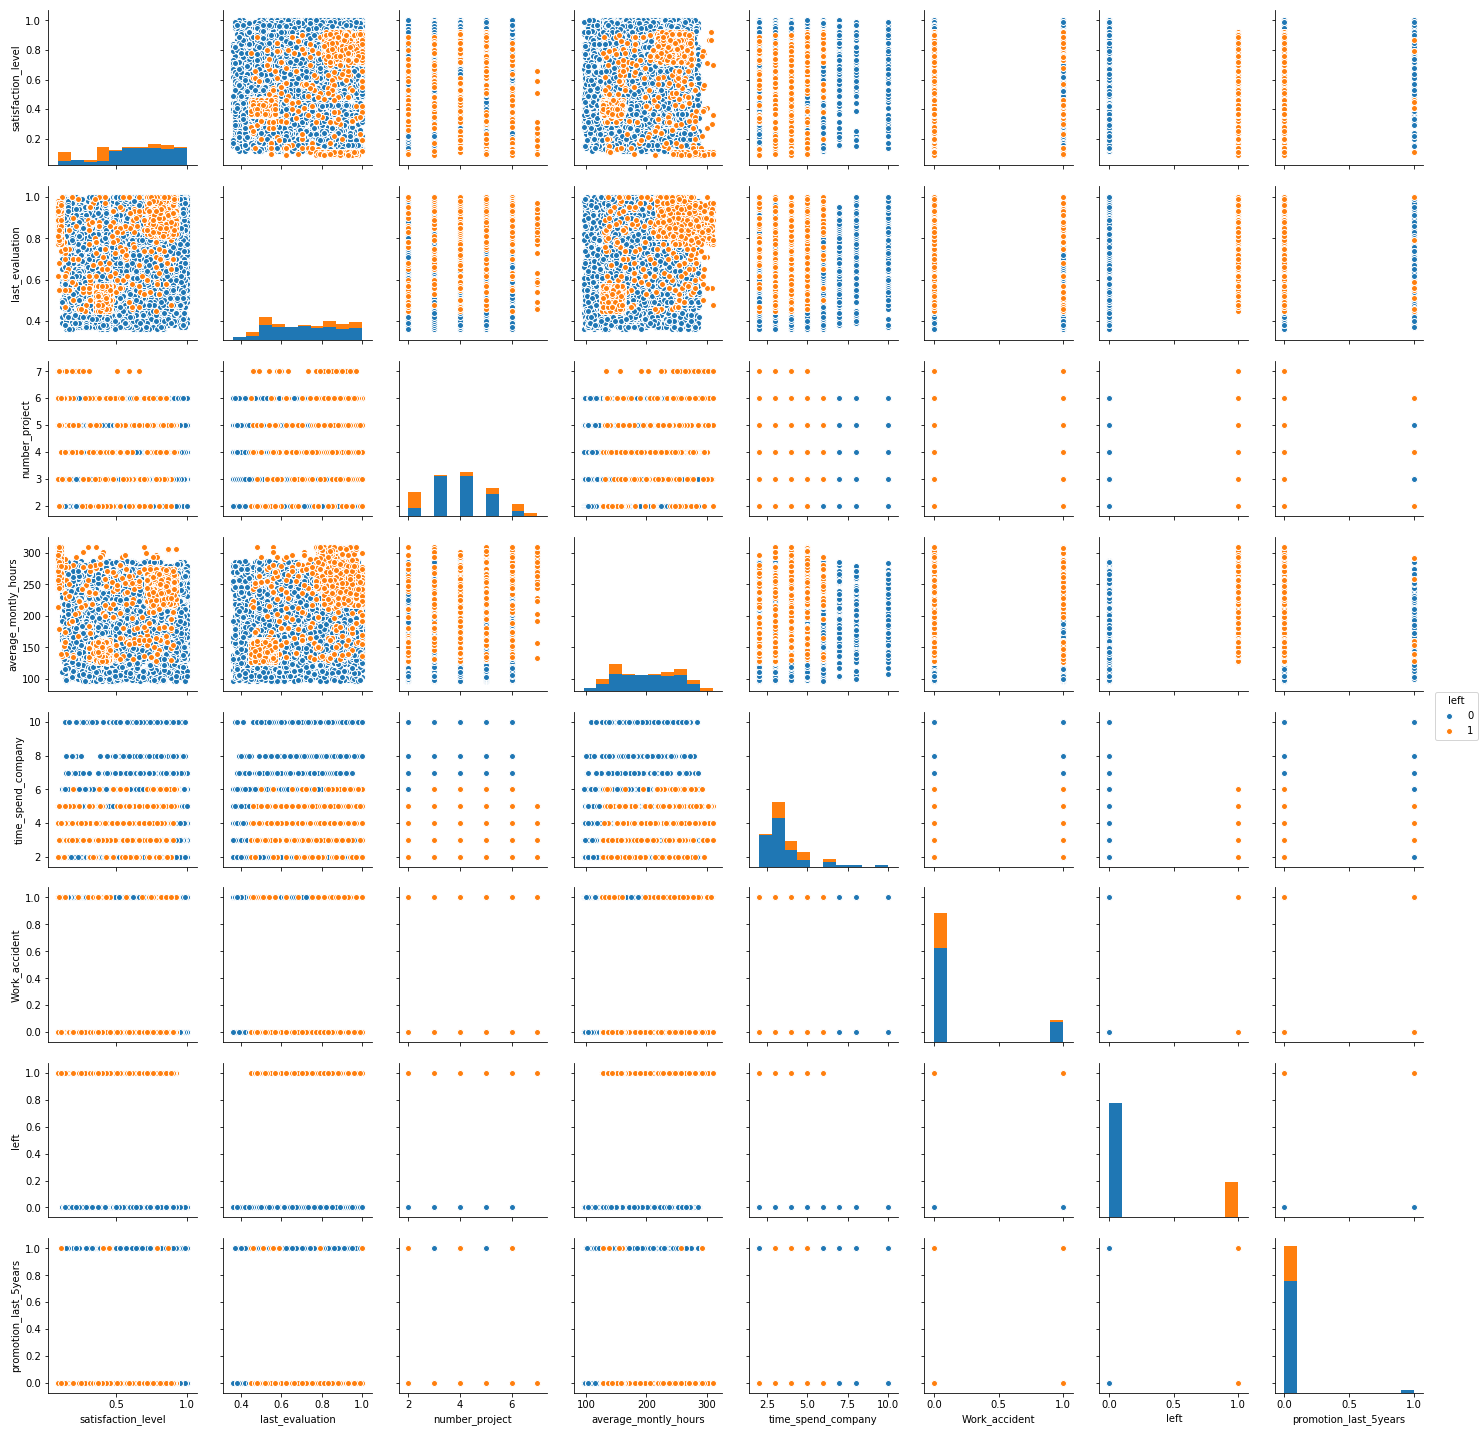

In [109]:
sns.pairplot(df, hue='left')

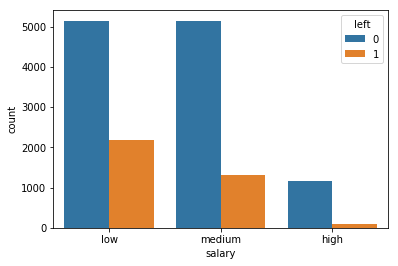

In [29]:
sns.countplot(x='salary', data=df, hue='left')

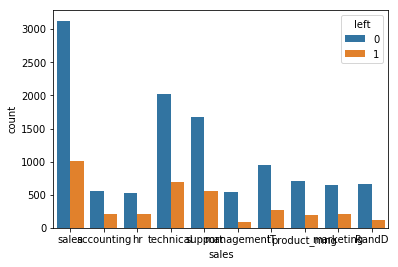

In [33]:
sns.countplot(x='sales', data=df, hue='left')

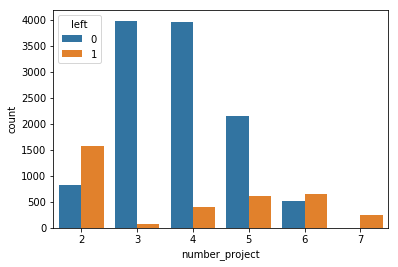

In [45]:
sns.countplot(x='number_project',data=df,hue='left')

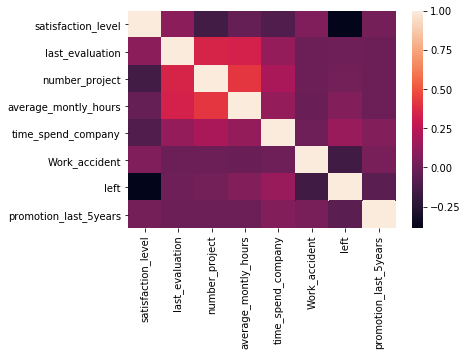

In [111]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [43]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


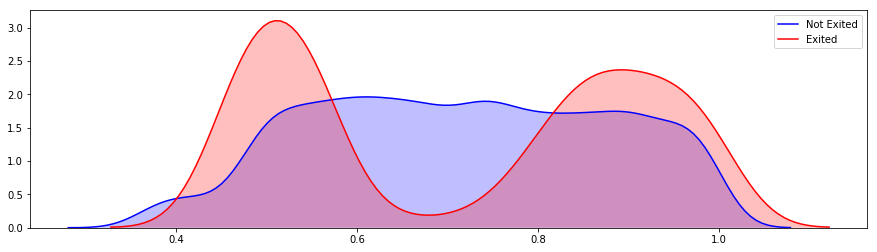

In [47]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Not Exited')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Exited')

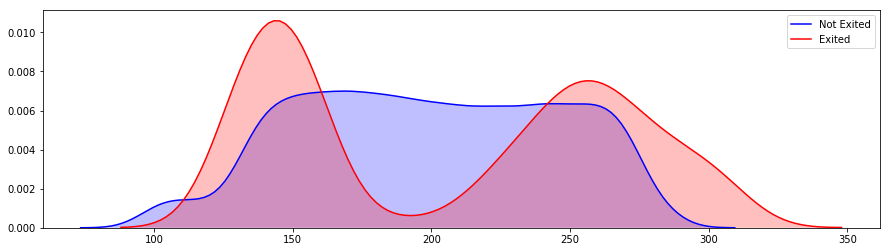

In [117]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='Not Exited')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Exited')

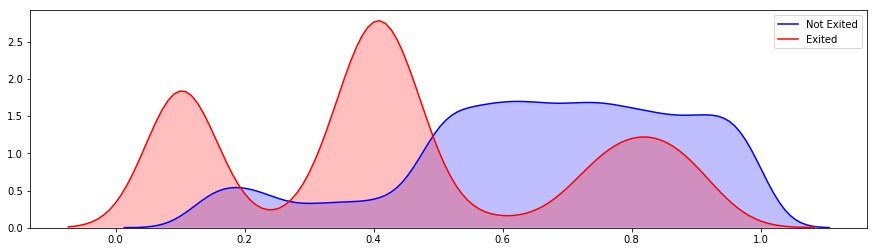

In [57]:
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'], color='b',shade=True, label='Not Exited')
ax = sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Exited')

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


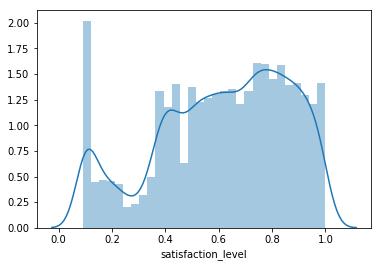

In [67]:
sns.distplot(df['satisfaction_level'],bins=30)

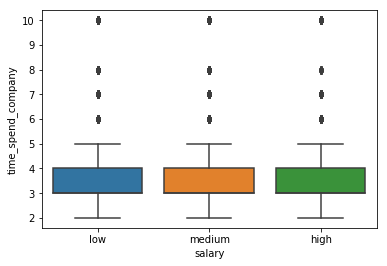

In [68]:
sns.boxplot(x='salary',y='time_spend_company',data=df)

### Feature Engineering

#### Top 3 features:
1. Satisfaction
2. Years at Company
3. Evaluation

# Evaluation of various prediction models

### We will use 3 types of Models: 

#### 1. Logistic Regression
#### 2. Decision Tree Classifier
#### 3. Random Forest Classifier

Renaming the columns

In [83]:
df = df.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'left' : 'Exit'
                        })


In [87]:
df["Department"] = df["Department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [88]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Exit,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


##  Use Train Test Split to separate data into training and testing sets

In [98]:
from sklearn.model_selection import train_test_split
X = df[['Satisfaction','Evaluation','ProjectCount','AverageMonthlyHours','YearsAtCompany','WorkAccident','Promotion','Department','salary']]
y = df['Exit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85      3769
          1       0.49      0.24      0.32      1181

avg / total       0.72      0.76      0.73      4950



## Decision Tree Model

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      3769
          1       0.93      0.96      0.95      1181

avg / total       0.97      0.97      0.97      4950



## Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3769
          1       0.99      0.96      0.98      1181

avg / total       0.99      0.99      0.99      4950



# The End!